In [645]:
import numpy as np
import pandas as pd
import matplotlib as plt
import networkx as nx
%matplotlib inline
# from DYNASMART_Process import *
from Modules import DYNASMART_Process as dy
# import preprocessing_read_skim_file as rs
from Modules import AV_functions as av
from Modules import Solve_DARP as sod
from Modules import Postprocess_DARP as pod
from Modules import Preprocess_DARP as prd
from Modules import DARP_to_DYNA as dtd
from gurobipy import *
from Modules import *
import datetime
import requests
import math
import importlib

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [646]:
#Read in the basic traveler and trips informationa and joint the houshold id
# traveler_info=pd.read_csv('input/traveler.csv')
personData=pd.read_csv('input/personData_1.csv')
person_type_dic=dict(zip(personData.person_id,personData.type))
traveler_trips=pd.read_csv('input/traveler_trip_info_improved.csv',index_col=0)
num_zones,num_nodes,num_links,node_detail,node_id,link_detail,link_id=dy.read_network('input/network.dat')
nodexy=dy.read_xy('input/xy.dat')
superzone_filepath='Input/SuperZone.dat'
linktraveltime_filepath='Input/output_td_linktraveltime.dat'
superzone_map=dy.read_superzone_info(superzone_filepath)
origin_path='Input/origin.dat'
destination_path='Input/destination.dat'
origins,destinations,origin_links=dy.read_origin_destion(origin_path,destination_path)
origin_links['length']=origin_links.apply(lambda row: 
                                          link_detail[int(link_id[node_id[row.u_node],node_id[row.d_node]])][0,4],axis=1)
VPNRSkim_folder_filepath='Input/vehicularPNRSkim'
Vehicular_Skim,Vehicular_Skim_Dict=dy.read_vehicle_skim(VPNRSkim_folder_filepath)
transit_skim_folderpath='Input/'
TransitMazTazFlag,drivingweight,walkingweight,\
TransitSkimTimeIntervalLength,MaxNumTransitSkimTimeInterval,WalkSpeed,transit_zone_candidates,\
Transit_AB_Cost_Skim,Transit_AB_Time_Skim,three_link_walk=dy.read_transitskim(transit_skim_folderpath)
Transit_AB_Cost_Skim_Dict=dy.convert_skim_dataframe_to_dict(Transit_AB_Cost_Skim,TransitSkimTimeIntervalLength)
Transit_AB_Time_Skim_Dict=dy.convert_skim_dataframe_to_dict(Transit_AB_Time_Skim,TransitSkimTimeIntervalLength)
transit_zone_dict={}
for link_zone in three_link_walk.three_link_zone.unique():
    transit_zone_dict[link_zone]=list(three_link_walk[three_link_walk.three_link_zone==link_zone]['transit_zone'].astype(int))
three_link_walk_dict={}
for index,group in three_link_walk.groupby(['three_link_zone']):
    three_link_walk_dict[index]={}
    for inx,row in group.iterrows():
        three_link_walk_dict[index][row.transit_zone]=row.distance
intrasuperzone_vehicle_filepath='Input/intrasuperzone_vehicle.dat'
intrasuperzone_path_filepath='Input/intrasuperzone_path.dat'
intrasuperzone_info,intrasuperzone_path_dic=dtd.read_intrasuperzone_files(intrasuperzone_vehicle_filepath,intrasuperzone_path_filepath)
traveler_trips=prd.compare_mode_utlity(traveler_trips,TransitMazTazFlag,
                        three_link_walk_dict,Transit_AB_Cost_Skim_Dict,
                        Transit_AB_Time_Skim_Dict,TransitSkimTimeIntervalLength,
                        Vehicular_Skim_Dict,superzone_map,drivingcost_per_mile,transit_zone_dict)

56 57 72


In [ ]:
output_flag=0
# target_hh_id=2744264
min_length=15
max_length=20
single_model_runtime=60*3
drivingcost_per_mile=0.5
reward_mode=1
run_mode=0
darp_solutions=[]
cav_use_mode=0
num_time_interval=1
TL=[i*1440/num_time_interval for i in range(num_time_interval)]
TU=[(i+1)*1440/num_time_interval for i in range(num_time_interval)]
num_cav=1
share_ride_factor=1.5
time_window_flag=0
target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
target_trips=target_trips.append(traveler_trips[traveler_trips.tripmode>8])
target_trips.value_of_time=target_trips.value_of_time*0.8
route_info_modechoice08,darp_solutions_modechoice08=\
sod.get_route_info_allhh(target_trips,
                         output_flag,min_length,max_length,single_model_runtime,drivingcost_per_mile,
                         reward_mode,run_mode,cav_use_mode,num_time_interval,num_cav,share_ride_factor
                         ,time_window_flag,Vehicular_Skim_Dict,
                         Transit_AB_Cost_Skim_Dict,Transit_AB_Time_Skim_Dict,three_link_walk_dict,
                         superzone_map,TL,TU,
                         transit_zone_dict,transit_zone_candidates,TransitMazTazFlag,
                         TransitSkimTimeIntervalLength )

Estimate Route for the  0 th household  2018-07-16 14:52:24.078179
1 9 2018-07-16 14:52:24.705221
2 16 2018-07-16 14:52:25.602267
3 13 2018-07-16 14:52:26.487321
4 27 2018-07-16 14:52:28.205421
5 9 2018-07-16 14:52:28.601449
6 9 2018-07-16 14:52:29.054477
7 8 2018-07-16 14:52:29.439498
8 9 2018-07-16 14:52:29.920522
9 8 2018-07-16 14:52:30.328551
10 7 2018-07-16 14:52:30.662565
11 11 2018-07-16 14:52:31.734631
12 12 2018-07-16 14:52:32.204658
13 4 2018-07-16 14:52:32.430670
14 9 2018-07-16 14:52:32.877698
15 14 2018-07-16 14:52:33.824753
16 14 2018-07-16 14:52:34.582802
17 11 2018-07-16 14:52:35.134829
18 8 2018-07-16 14:52:35.551860
19 6 2018-07-16 14:52:35.890872
20 5 2018-07-16 14:52:36.303898
21 6 2018-07-16 14:52:36.683921
22 10 2018-07-16 14:52:37.454964
23 19 2018-07-16 14:52:38.936053
24 18 2018-07-16 14:52:39.727102
25 14 2018-07-16 14:52:40.773164
26 6 2018-07-16 14:52:41.013173
27 11 2018-07-16 14:52:41.639212
28 6 2018-07-16 14:52:41.950232
29 5 2018-07-16 14:52:42.231246
3

243 15 2018-07-16 14:55:38.199583
244 21 2018-07-16 14:55:39.457655
245 16 2018-07-16 14:55:40.367707
246 10 2018-07-16 14:55:40.937747
247 10 2018-07-16 14:55:41.564778
248 9 2018-07-16 14:55:42.005805
249 10 2018-07-16 14:55:42.534836
250 12 2018-07-16 14:55:43.677903
251 21 2018-07-16 14:55:45.410009
252 27 2018-07-16 14:55:48.708197
253 2 2018-07-16 14:55:48.860206
254 20 2018-07-16 14:55:52.885445
255 4 2018-07-16 14:55:53.118458
256 18 2018-07-16 14:55:55.749614
257 11 2018-07-16 14:55:56.159640
258 14 2018-07-16 14:55:56.699669
259 8 2018-07-16 14:55:57.105690
260 10 2018-07-16 14:55:57.570720
261 26 2018-07-16 14:56:01.607956
262 25 2018-07-16 14:56:21.025102
263 11 2018-07-16 14:56:21.538127
264 2 2018-07-16 14:56:21.686140
265 13 2018-07-16 14:56:22.247169
266 13 2018-07-16 14:56:23.137221
267 9 2018-07-16 14:56:23.553246
268 10 2018-07-16 14:56:24.069284
269 4 2018-07-16 14:56:24.256288
270 10 2018-07-16 14:56:24.613310
271 7 2018-07-16 14:56:24.929331
272 9 2018-07-16 14:56

483 9 2018-07-16 14:59:53.602900
484 8 2018-07-16 14:59:54.037922
485 4 2018-07-16 14:59:54.298937
486 17 2018-07-16 14:59:55.101983
487 10 2018-07-16 14:59:55.479010
488 14 2018-07-16 14:59:56.602076
489 7 2018-07-16 14:59:57.025102
490 11 2018-07-16 14:59:57.500124
491 9 2018-07-16 14:59:58.070160
492 14 2018-07-16 14:59:59.083605
493 9 2018-07-16 14:59:59.594640
494 7 2018-07-16 15:00:00.051662
495 7 2018-07-16 15:00:00.490688
496 7 2018-07-16 15:00:00.993715
497 5 2018-07-16 15:00:01.341738
498 8 2018-07-16 15:00:01.899770
499 9 2018-07-16 15:00:02.361800
500 11 2018-07-16 15:00:03.157844
Estimate Route for the  500 th household  2018-07-16 15:00:03.172845
501 7 2018-07-16 15:00:03.522864
502 16 2018-07-16 15:00:04.149900
503 18 2018-07-16 15:00:05.145960
504 20 2018-07-16 15:00:06.443036
505 10 2018-07-16 15:00:07.515104
506 12 2018-07-16 15:00:09.097196
507 5 2018-07-16 15:00:09.523218
508 11 2018-07-16 15:00:10.225259
509 8 2018-07-16 15:00:10.663288
510 2 2018-07-16 15:00:10.85

722 19 2018-07-16 15:02:45.675621
723 15 2018-07-16 15:02:47.482728
724 8 2018-07-16 15:02:47.745747
725 4 2018-07-16 15:02:48.002761
726 3 2018-07-16 15:02:48.173769
727 5 2018-07-16 15:02:48.501788
728 13 2018-07-16 15:02:51.506966
729 13 2018-07-16 15:02:52.413017
730 4 2018-07-16 15:02:52.611029
731 18 2018-07-16 15:02:54.046112
732 7 2018-07-16 15:02:54.355137
733 14 2018-07-16 15:02:55.001171
734 13 2018-07-16 15:02:56.457255
735 11 2018-07-16 15:02:57.894345
736 13 2018-07-16 15:02:58.721395
737 19 2018-07-16 15:02:59.541437
738 10 2018-07-16 15:03:00.135472
739 5 2018-07-16 15:03:00.425492
740 19 2018-07-16 15:03:01.743566
741 6 2018-07-16 15:03:02.032583
742 9 2018-07-16 15:03:02.456608
743 12 2018-07-16 15:03:03.065644
744 12 2018-07-16 15:03:03.604678
745 14 2018-07-16 15:03:04.279715
746 7 2018-07-16 15:03:04.531735
747 14 2018-07-16 15:03:05.207770
748 8 2018-07-16 15:03:05.600798
749 13 2018-07-16 15:03:06.472846
750 3 2018-07-16 15:03:06.652855
751 12 2018-07-16 15:03:07

963 7 2018-07-16 15:05:43.113054
964 5 2018-07-16 15:05:43.396068
965 19 2018-07-16 15:05:44.395127
966 10 2018-07-16 15:05:44.872155
967 15 2018-07-16 15:05:45.553195
968 8 2018-07-16 15:05:45.957220
969 8 2018-07-16 15:05:46.335241
970 3 2018-07-16 15:05:46.517251
971 15 2018-07-16 15:05:47.351301
972 8 2018-07-16 15:05:47.645317
973 5 2018-07-16 15:05:48.013342
974 11 2018-07-16 15:05:48.777389
975 6 2018-07-16 15:05:49.042399
976 4 2018-07-16 15:05:49.283418
977 21 2018-07-16 15:05:50.661494
978 10 2018-07-16 15:05:51.193531
979 5 2018-07-16 15:05:51.619551
980 11 2018-07-16 15:05:52.499608
981 19 2018-07-16 15:05:53.231645
982 19 2018-07-16 15:05:53.908685
983 20 2018-07-16 15:05:56.995867
984 8 2018-07-16 15:05:57.868923
985 7 2018-07-16 15:05:58.186938
986 2 2018-07-16 15:05:58.352947
987 10 2018-07-16 15:05:59.923041
988 6 2018-07-16 15:06:00.220055
989 16 2018-07-16 15:06:01.586137
990 8 2018-07-16 15:06:01.942162
991 5 2018-07-16 15:06:02.210174
992 15 2018-07-16 15:06:03.122

1198 14 2018-07-16 15:08:22.266406
1199 4 2018-07-16 15:08:22.500424
1200 3 2018-07-16 15:08:22.672430
Estimate Route for the  1200 th household  2018-07-16 15:08:22.685429
1201 12 2018-07-16 15:08:23.235462
1202 5 2018-07-16 15:08:23.503477
1203 20 2018-07-16 15:08:24.984569
1204 14 2018-07-16 15:08:26.192635
1205 13 2018-07-16 15:08:27.025687
1206 8 2018-07-16 15:08:27.413713
1207 3 2018-07-16 15:08:27.601718
1208 13 2018-07-16 15:08:28.439773
1209 4 2018-07-16 15:08:28.625778
1210 7 2018-07-16 15:08:28.937802
1211 16 2018-07-16 15:08:29.675842
1212 10 2018-07-16 15:08:30.181872
1213 1 2018-07-16 15:08:30.292877
1214 8 2018-07-16 15:08:30.553894
1215 7 2018-07-16 15:08:30.893912
1216 9 2018-07-16 15:08:31.166933
1217 7 2018-07-16 15:08:31.405943
1218 24 2018-07-16 15:08:32.992035
1219 8 2018-07-16 15:08:33.409060
1220 5 2018-07-16 15:08:33.751080
1221 13 2018-07-16 15:08:34.214108
1222 5 2018-07-16 15:08:34.463121
1223 4 2018-07-16 15:08:34.657135
1224 6 2018-07-16 15:08:35.081160
12

1430 8 2018-07-16 15:10:59.211808
1431 11 2018-07-16 15:10:59.735841
1432 12 2018-07-16 15:11:00.252871
1433 11 2018-07-16 15:11:00.627892
1434 3 2018-07-16 15:11:00.827903
1435 5 2018-07-16 15:11:01.067916
1436 17 2018-07-16 15:11:01.844962
1437 14 2018-07-16 15:11:02.375995
1438 24 2018-07-16 15:11:04.249105
1439 12 2018-07-16 15:11:04.961145
1440 11 2018-07-16 15:11:05.475180
1441 6 2018-07-16 15:11:05.758193
1442 10 2018-07-16 15:11:06.798253
1443 4 2018-07-16 15:11:07.075271
1444 14 2018-07-16 15:11:07.630305
1445 16 2018-07-16 15:11:08.216342
1446 14 2018-07-16 15:11:09.114393
1447 16 2018-07-16 15:11:10.797490
1448 8 2018-07-16 15:11:11.091508
1449 19 2018-07-16 15:11:13.640662
1450 14 2018-07-16 15:11:15.023737
1451 5 2018-07-16 15:11:15.306756
1452 5 2018-07-16 15:11:15.541768
1453 9 2018-07-16 15:11:16.039801
1454 8 2018-07-16 15:11:16.353821
1455 14 2018-07-16 15:11:16.995852
1456 10 2018-07-16 15:11:17.499884
1457 11 2018-07-16 15:11:18.127923
1458 10 2018-07-16 15:11:19.58

1664 23 2018-07-16 15:14:46.541428
1665 12 2018-07-16 15:14:49.446695
1666 6 2018-07-16 15:14:50.911780
1667 12 2018-07-16 15:15:10.790942
1668 10 2018-07-16 15:15:11.626994
1669 3 2018-07-16 15:15:11.812003
1670 11 2018-07-16 15:15:12.468041
1671 8 2018-07-16 15:15:13.215088
1672 14 2018-07-16 15:15:14.863184
1673 3 2018-07-16 15:15:15.577227
1674 14 2018-07-16 15:15:18.579484
1675 4 2018-07-16 15:15:19.339559
1676 6 2018-07-16 15:15:19.894590
1677 6 2018-07-16 15:15:20.225611
1678 6 2018-07-16 15:15:20.586629
1679 10 2018-07-16 15:15:22.869767
1680 10 2018-07-16 15:15:24.034836
1681 15 2018-07-16 15:15:28.197081
1682 11 2018-07-16 15:15:29.213138
1683 6 2018-07-16 15:15:29.454153
1684 7 2018-07-16 15:15:29.788171
1685 7 2018-07-16 15:15:30.066187
1686 16 2018-07-16 15:15:30.615221
1687 7 2018-07-16 15:15:30.979244
1688 7 2018-07-16 15:15:31.325263
1689 14 2018-07-16 15:15:32.357323
1690 8 2018-07-16 15:15:32.741345
1691 10 2018-07-16 15:15:33.248374
1692 4 2018-07-16 15:15:33.486389


1898 9 2018-07-16 15:17:56.511555
1899 8 2018-07-16 15:17:56.943578
1900 22 2018-07-16 15:17:58.135649
Estimate Route for the  1900 th household  2018-07-16 15:17:58.151650
1901 14 2018-07-16 15:17:59.049703
1902 18 2018-07-16 15:17:59.903754
1903 3 2018-07-16 15:18:00.078758
1904 9 2018-07-16 15:18:00.378776
1905 5 2018-07-16 15:18:00.696800
1906 9 2018-07-16 15:18:00.989812
1907 12 2018-07-16 15:18:02.045875
1908 12 2018-07-16 15:18:03.094937
1909 8 2018-07-16 15:18:03.510961
1910 8 2018-07-16 15:18:03.866984
1911 12 2018-07-16 15:18:04.613025
1912 16 2018-07-16 15:18:05.946103
1913 11 2018-07-16 15:18:07.350192
1914 8 2018-07-16 15:18:07.941221
1915 12 2018-07-16 15:18:08.608261
1916 12 2018-07-16 15:18:09.402308
1917 10 2018-07-16 15:18:09.804330
1918 9 2018-07-16 15:18:10.186358
1919 6 2018-07-16 15:18:10.600382
1920 5 2018-07-16 15:18:10.868398
1921 11 2018-07-16 15:18:11.967458
1922 2 2018-07-16 15:18:12.249486
1923 2 2018-07-16 15:18:12.607032
1924 20 2018-07-16 15:18:14.300715

2130 12 2018-07-16 15:20:58.198076
2131 3 2018-07-16 15:20:58.436091
2132 10 2018-07-16 15:20:58.887119
2133 16 2018-07-16 15:21:00.126191
2134 9 2018-07-16 15:21:00.628222
2135 13 2018-07-16 15:21:02.160311
2136 9 2018-07-16 15:21:02.638339
2137 22 2018-07-16 15:21:03.426387
2138 14 2018-07-16 15:21:04.435445
2139 10 2018-07-16 15:21:04.780468
2140 11 2018-07-16 15:21:05.334501
2141 4 2018-07-16 15:21:05.493510
2142 15 2018-07-16 15:21:06.068545
2143 7 2018-07-16 15:21:06.383558
2144 10 2018-07-16 15:21:06.850588
2145 6 2018-07-16 15:21:07.104605
2146 4 2018-07-16 15:21:07.298616
2147 9 2018-07-16 15:21:07.738637
2148 11 2018-07-16 15:21:08.230668
2149 19 2018-07-16 15:21:09.549747
2150 5 2018-07-16 15:21:09.874762
2151 19 2018-07-16 15:21:11.168843
2152 10 2018-07-16 15:21:11.529864
2153 8 2018-07-16 15:21:11.879880
2154 4 2018-07-16 15:21:12.062891
2155 7 2018-07-16 15:21:12.358908
2156 19 2018-07-16 15:21:14.704047
2157 11 2018-07-16 15:21:15.062068
2158 27 2018-07-16 15:21:17.8602

2364 8 2018-07-16 15:23:58.863695
2365 4 2018-07-16 15:23:59.060707
2366 11 2018-07-16 15:23:59.674743
2367 11 2018-07-16 15:24:00.340786
2368 15 2018-07-16 15:24:01.537853
2369 6 2018-07-16 15:24:01.854876
2370 8 2018-07-16 15:24:02.166889
2371 10 2018-07-16 15:24:02.663918
2372 2 2018-07-16 15:24:02.841930
2373 7 2018-07-16 15:24:03.249953
2374 18 2018-07-16 15:24:04.701039
2375 5 2018-07-16 15:24:04.977059
2376 10 2018-07-16 15:24:05.474084
2377 12 2018-07-16 15:24:06.001116
2378 12 2018-07-16 15:24:06.462147
2379 10 2018-07-16 15:24:06.802166
2380 7 2018-07-16 15:24:07.171188
2381 5 2018-07-16 15:24:07.508203
2382 3 2018-07-16 15:24:07.702216
2383 8 2018-07-16 15:24:08.090238
2384 9 2018-07-16 15:24:08.544265
2385 2 2018-07-16 15:24:08.726274
2386 7 2018-07-16 15:24:08.984295
2387 6 2018-07-16 15:24:09.258306
2388 5 2018-07-16 15:24:09.518322
2389 6 2018-07-16 15:24:09.837346
2390 3 2018-07-16 15:24:10.033351
2391 2 2018-07-16 15:24:10.217362
2392 8 2018-07-16 15:24:10.527381
2393 

2599 6 2018-07-16 15:26:18.450901
2600 3 2018-07-16 15:26:18.610908
Estimate Route for the  2600 th household  2018-07-16 15:26:18.637910
2601 7 2018-07-16 15:26:18.940927
2602 8 2018-07-16 15:26:19.296950
2603 15 2018-07-16 15:26:20.274006
2604 8 2018-07-16 15:26:20.698032
2605 9 2018-07-16 15:26:21.145057
2606 11 2018-07-16 15:26:21.529081
2607 5 2018-07-16 15:26:21.765094
2608 10 2018-07-16 15:26:22.318127
2609 2 2018-07-16 15:26:22.511137
2610 5 2018-07-16 15:26:22.702149
2611 9 2018-07-16 15:26:23.187178
2612 11 2018-07-16 15:26:23.974225
2613 7 2018-07-16 15:26:24.231240
2614 10 2018-07-16 15:26:24.755271
2615 3 2018-07-16 15:26:24.966284
2616 6 2018-07-16 15:26:25.329304
2617 8 2018-07-16 15:26:25.728329
2618 8 2018-07-16 15:26:26.132354
2619 9 2018-07-16 15:26:26.500378
2620 30 2018-07-16 15:26:29.455551
2621 5 2018-07-16 15:26:29.740562
2622 7 2018-07-16 15:26:30.017584
2623 10 2018-07-16 15:26:30.506614
2624 7 2018-07-16 15:26:30.863635
2625 2 2018-07-16 15:26:31.050639
2626 

2832 8 2018-07-16 15:28:52.587958
2833 2 2018-07-16 15:28:52.762969
2834 7 2018-07-16 15:28:53.110992
2835 5 2018-07-16 15:28:53.719027
2836 2 2018-07-16 15:28:53.897037
2837 4 2018-07-16 15:28:54.123052
2838 3 2018-07-16 15:28:54.344063
2839 5 2018-07-16 15:28:54.584076
2840 5 2018-07-16 15:28:54.845097
2841 12 2018-07-16 15:28:56.163174
2842 10 2018-07-16 15:28:56.689206
2843 19 2018-07-16 15:28:57.766262
2844 7 2018-07-16 15:28:58.266298
2845 5 2018-07-16 15:28:58.562314
2846 8 2018-07-16 15:28:58.838326
2847 5 2018-07-16 15:28:59.119348
2848 10 2018-07-16 15:28:59.456363
2849 4 2018-07-16 15:28:59.658373
2850 11 2018-07-16 15:29:00.304413
2851 6 2018-07-16 15:29:00.591435
2852 8 2018-07-16 15:29:01.073463
2853 9 2018-07-16 15:29:01.475483
2854 2 2018-07-16 15:29:01.646491
2855 11 2018-07-16 15:29:02.032516
2856 10 2018-07-16 15:29:02.398537
2857 14 2018-07-16 15:29:03.945628
2858 16 2018-07-16 15:29:04.727673
2859 4 2018-07-16 15:29:05.021691
2860 14 2018-07-16 15:29:05.701729
2861

3067 15 2018-07-16 15:31:15.100336
3068 7 2018-07-16 15:31:15.351350
3069 7 2018-07-16 15:31:16.032395
3070 15 2018-07-16 15:31:16.895446
3071 14 2018-07-16 15:31:17.369469
3072 13 2018-07-16 15:31:18.198517
3073 7 2018-07-16 15:31:18.519536
3074 6 2018-07-16 15:31:18.907558
3075 6 2018-07-16 15:31:19.218582
3076 11 2018-07-16 15:31:19.780616
3077 2 2018-07-16 15:31:19.952625
3078 4 2018-07-16 15:31:20.187634
3079 12 2018-07-16 15:31:21.061685
3080 4 2018-07-16 15:31:21.243695
3081 7 2018-07-16 15:31:21.588716
3082 5 2018-07-16 15:31:21.922736
3083 5 2018-07-16 15:31:22.177750
3084 12 2018-07-16 15:31:22.581774
3085 6 2018-07-16 15:31:22.869794
3086 17 2018-07-16 15:31:24.170871
3087 10 2018-07-16 15:31:24.532896
3088 18 2018-07-16 15:31:25.247931
3089 11 2018-07-16 15:31:25.738966
3090 2 2018-07-16 15:31:25.923970
3091 3 2018-07-16 15:31:26.101981
3092 9 2018-07-16 15:31:26.549013
3093 10 2018-07-16 15:31:27.029036
3094 14 2018-07-16 15:31:27.675080
3095 2 2018-07-16 15:31:27.851089
3

3301 4 2018-07-16 15:34:08.259811
3302 7 2018-07-16 15:34:08.539826
3303 7 2018-07-16 15:34:08.883847
3304 3 2018-07-16 15:34:09.079863
3305 6 2018-07-16 15:34:09.355875
3306 7 2018-07-16 15:34:09.682894
3307 5 2018-07-16 15:34:09.905912
3308 8 2018-07-16 15:34:10.328932
3309 6 2018-07-16 15:34:10.626951
3310 4 2018-07-16 15:34:10.838961
3311 10 2018-07-16 15:34:11.348991
3312 5 2018-07-16 15:34:11.629009
3313 12 2018-07-16 15:34:12.079034
3314 9 2018-07-16 15:34:12.522065
3315 6 2018-07-16 15:34:12.829078
3316 1 2018-07-16 15:34:12.956091
3317 7 2018-07-16 15:34:13.170101
3318 4 2018-07-16 15:34:13.412113
3319 11 2018-07-16 15:34:14.066152
3320 13 2018-07-16 15:34:14.607183
3321 12 2018-07-16 15:34:15.478236
3322 5 2018-07-16 15:34:15.758256
3323 6 2018-07-16 15:34:16.060271
3324 4 2018-07-16 15:34:16.343291
3325 10 2018-07-16 15:34:16.909324
3326 3 2018-07-16 15:34:17.097331
3327 4 2018-07-16 15:34:17.302346
3328 6 2018-07-16 15:34:17.620359
3329 1 2018-07-16 15:34:17.753367
3330 13 

3536 16 2018-07-16 15:36:45.249038
3537 3 2018-07-16 15:36:45.457048
3538 16 2018-07-16 15:36:46.202094
3539 11 2018-07-16 15:36:46.889133
3540 6 2018-07-16 15:36:47.196156
3541 4 2018-07-16 15:36:47.440168
3542 14 2018-07-16 15:36:49.486289
3543 5 2018-07-16 15:36:49.827306
3544 6 2018-07-16 15:36:50.165327
3545 13 2018-07-16 15:36:52.559471
3546 11 2018-07-16 15:36:54.441578
3547 4 2018-07-16 15:36:54.690591
3548 6 2018-07-16 15:36:54.970614
3549 8 2018-07-16 15:36:55.368634
3550 7 2018-07-16 15:36:55.606651
3551 8 2018-07-16 15:36:56.028674
3552 5 2018-07-16 15:36:56.323688
3553 5 2018-07-16 15:36:56.633713
3554 5 2018-07-16 15:36:56.922724
3555 9 2018-07-16 15:36:57.309752
3556 4 2018-07-16 15:36:57.540764
3557 15 2018-07-16 15:36:58.575822
3558 3 2018-07-16 15:36:58.777837
3559 9 2018-07-16 15:36:59.231861
3560 7 2018-07-16 15:36:59.766894
3561 10 2018-07-16 15:37:00.173914
3562 13 2018-07-16 15:37:00.855953
3563 11 2018-07-16 15:37:01.256979
3564 8 2018-07-16 15:37:01.687002
3565

3771 8 2018-07-16 15:39:31.376915
3772 5 2018-07-16 15:39:31.635932
3773 13 2018-07-16 15:39:32.486983
3774 9 2018-07-16 15:39:33.068015
3775 2 2018-07-16 15:39:33.255029
3776 20 2018-07-16 15:39:34.635105
3777 9 2018-07-16 15:39:35.113138
3778 11 2018-07-16 15:39:35.502157
3779 8 2018-07-16 15:39:35.876184
3780 8 2018-07-16 15:39:36.249202
3781 10 2018-07-16 15:39:36.783235
3782 10 2018-07-16 15:39:37.410274
3783 9 2018-07-16 15:39:38.830356
3784 10 2018-07-16 15:39:39.258378
3785 6 2018-07-16 15:39:39.573402
3786 7 2018-07-16 15:39:39.978421
3787 5 2018-07-16 15:39:40.398445
3788 5 2018-07-16 15:39:40.699462
3789 3 2018-07-16 15:39:40.924476
3790 7 2018-07-16 15:39:41.225498
3791 3 2018-07-16 15:39:41.417503
3792 7 2018-07-16 15:39:41.800528
3793 5 2018-07-16 15:39:42.114545
3794 6 2018-07-16 15:39:42.408564
3795 5 2018-07-16 15:39:42.684578
3796 2 2018-07-16 15:39:42.881592
3797 14 2018-07-16 15:39:43.416622
3798 8 2018-07-16 15:39:44.045664
3799 7 2018-07-16 15:39:44.409681
3800 8 

4004 3 2018-07-16 15:41:57.335493
4005 4 2018-07-16 15:41:57.599508
4006 14 2018-07-16 15:42:00.195662
4007 2 2018-07-16 15:42:00.418676
4008 8 2018-07-16 15:42:00.896704
4009 5 2018-07-16 15:42:01.209721
4010 2 2018-07-16 15:42:01.439734
4011 12 2018-07-16 15:42:02.351790
4012 10 2018-07-16 15:42:02.734812
4013 10 2018-07-16 15:42:03.393851
4014 5 2018-07-16 15:42:03.759870
4015 5 2018-07-16 15:42:04.073891
4016 6 2018-07-16 15:42:04.515916
4017 12 2018-07-16 15:42:05.144956
4018 8 2018-07-16 15:42:05.559976
4019 9 2018-07-16 15:42:06.001002
4020 3 2018-07-16 15:42:06.237016
4021 4 2018-07-16 15:42:06.543035
4022 18 2018-07-16 15:42:08.096125
4023 14 2018-07-16 15:42:09.156190
4024 4 2018-07-16 15:42:09.359201
4025 4 2018-07-16 15:42:09.688221
4026 17 2018-07-16 15:42:11.910349
4027 6 2018-07-16 15:42:12.224368
4028 7 2018-07-16 15:42:12.554392
4029 12 2018-07-16 15:42:13.064419
4030 9 2018-07-16 15:42:13.575451
4031 25 2018-07-16 15:42:15.766578
4032 20 2018-07-16 15:42:18.980768
403

4239 2 2018-07-16 15:44:36.624855
4240 8 2018-07-16 15:44:37.038879
4241 16 2018-07-16 15:44:37.763921
4242 3 2018-07-16 15:44:37.969934
4243 11 2018-07-16 15:44:38.619973
4244 9 2018-07-16 15:44:39.127002
4245 4 2018-07-16 15:44:39.349018
4246 7 2018-07-16 15:44:39.773043
4247 10 2018-07-16 15:44:40.342074
4248 8 2018-07-16 15:44:40.773101
4249 6 2018-07-16 15:44:41.258127
4250 12 2018-07-16 15:44:42.400195
4251 20 2018-07-16 15:44:43.449257
4252 6 2018-07-16 15:44:43.807278
4253 7 2018-07-16 15:44:44.300307
4254 14 2018-07-16 15:44:44.965347
4255 11 2018-07-16 15:44:46.067410
4256 13 2018-07-16 15:44:47.404488
4257 4 2018-07-16 15:44:47.731510
4258 6 2018-07-16 15:44:48.169536
4259 6 2018-07-16 15:44:48.536554
4260 2 2018-07-16 15:44:48.748567
4261 9 2018-07-16 15:44:49.330603
4262 10 2018-07-16 15:44:49.975642
4263 13 2018-07-16 15:44:57.780101
4264 15 2018-07-16 15:45:01.473317
4265 6 2018-07-16 15:45:01.819338
4266 12 2018-07-16 15:45:02.249362
4267 3 2018-07-16 15:45:02.459375
42

4474 4 2018-07-16 15:47:04.032521
4475 2 2018-07-16 15:47:04.219534
4476 7 2018-07-16 15:47:04.545552
4477 9 2018-07-16 15:47:05.042577
4478 3 2018-07-16 15:47:05.250591
4479 12 2018-07-16 15:47:09.181825
4480 10 2018-07-16 15:47:09.733854
4481 4 2018-07-16 15:47:10.008872
4482 11 2018-07-16 15:47:10.736915
4483 4 2018-07-16 15:47:10.907923
4484 3 2018-07-16 15:47:11.117939
4485 10 2018-07-16 15:47:12.989046
4486 5 2018-07-16 15:47:13.264065
4487 8 2018-07-16 15:47:13.619084
4488 4 2018-07-16 15:47:13.857096
4489 6 2018-07-16 15:47:14.189117
4490 11 2018-07-16 15:47:16.329247
4491 10 2018-07-16 15:47:16.678263
4492 4 2018-07-16 15:47:16.909281
4493 8 2018-07-16 15:47:17.298301
4494 9 2018-07-16 15:47:17.616323
4495 8 2018-07-16 15:47:18.039342
4496 11 2018-07-16 15:47:18.649384
4497 2 2018-07-16 15:47:18.855391
4498 4 2018-07-16 15:47:19.128411
4499 11 2018-07-16 15:47:19.660440
4500 8 2018-07-16 15:47:20.061466
Estimate Route for the  4500 th household  2018-07-16 15:47:20.098464
4501

4707 6 2018-07-16 15:49:12.158050
4708 11 2018-07-16 15:49:13.386128
4709 11 2018-07-16 15:49:14.226171
4710 7 2018-07-16 15:49:14.708202
4711 7 2018-07-16 15:49:15.102232
4712 8 2018-07-16 15:49:15.748260
4713 4 2018-07-16 15:49:15.984277
4714 2 2018-07-16 15:49:16.168285
4715 8 2018-07-16 15:49:16.610312
4716 9 2018-07-16 15:49:16.950336
4717 8 2018-07-16 15:49:17.380362
4718 4 2018-07-16 15:49:17.657378
4719 13 2018-07-16 15:49:18.690433
4720 4 2018-07-16 15:49:18.926447
4721 11 2018-07-16 15:49:19.454481
4722 7 2018-07-16 15:49:19.769499
4723 15 2018-07-16 15:49:20.935566
4724 6 2018-07-16 15:49:21.251589
4725 10 2018-07-16 15:49:21.649609
4726 10 2018-07-16 15:49:22.000628
4727 2 2018-07-16 15:49:22.131637
4728 3 2018-07-16 15:49:22.348648
4729 4 2018-07-16 15:49:22.619666
4730 10 2018-07-16 15:49:23.160702
4731 5 2018-07-16 15:49:23.449718
4732 13 2018-07-16 15:49:23.934747
4733 3 2018-07-16 15:49:24.155756
4734 10 2018-07-16 15:49:24.624788
4735 18 2018-07-16 15:49:25.488834
473

4942 13 2018-07-16 15:51:23.741784
4943 9 2018-07-16 15:51:24.214816
4944 1 2018-07-16 15:51:24.356824
4945 5 2018-07-16 15:51:24.633841
4946 5 2018-07-16 15:51:24.936853
4947 5 2018-07-16 15:51:25.270874
4948 13 2018-07-16 15:51:27.093981
4949 4 2018-07-16 15:51:27.334999
4950 4 2018-07-16 15:51:27.620012
4951 21 2018-07-16 15:51:28.867085
4952 14 2018-07-16 15:51:30.889206
4953 7 2018-07-16 15:51:31.266231
4954 4 2018-07-16 15:51:31.507241
4955 12 2018-07-16 15:51:32.307293
4956 6 2018-07-16 15:51:32.627310
4957 13 2018-07-16 15:51:33.150337
4958 9 2018-07-16 15:51:33.597365
4959 12 2018-07-16 15:51:34.574421
4960 6 2018-07-16 15:51:34.916445
4961 6 2018-07-16 15:51:35.218463
4962 13 2018-07-16 15:51:35.712487
4963 1 2018-07-16 15:51:35.853497
4964 2 2018-07-16 15:51:36.050512
4965 3 2018-07-16 15:51:36.227517
4966 2 2018-07-16 15:51:36.431534
4967 4 2018-07-16 15:51:36.645542
4968 4 2018-07-16 15:51:36.938560
4969 14 2018-07-16 15:51:37.504597
4970 2 2018-07-16 15:51:37.739608
4971 

5177 7 2018-07-16 15:53:44.830075
5178 7 2018-07-16 15:53:45.247100
5179 5 2018-07-16 15:53:45.601123
5180 5 2018-07-16 15:53:45.827140
5181 5 2018-07-16 15:53:46.099152
5182 7 2018-07-16 15:53:46.509175
5183 7 2018-07-16 15:53:46.812195
5184 16 2018-07-16 15:53:48.103269
5185 10 2018-07-16 15:53:48.486297
5186 6 2018-07-16 15:53:48.810310
5187 21 2018-07-16 15:53:50.363403
5188 3 2018-07-16 15:53:50.588419
5189 5 2018-07-16 15:53:50.914438
5190 10 2018-07-16 15:53:51.825493
5191 6 2018-07-16 15:53:52.155511
5192 4 2018-07-16 15:53:52.406521
5193 7 2018-07-16 15:53:52.752542
5194 5 2018-07-16 15:53:53.090561
5195 4 2018-07-16 15:53:53.347582
5196 5 2018-07-16 15:53:53.664599
5197 7 2018-07-16 15:53:54.075626
5198 4 2018-07-16 15:53:54.319637
5199 10 2018-07-16 15:53:54.819663
5200 8 2018-07-16 15:53:55.224687
Estimate Route for the  5200 th household  2018-07-16 15:53:55.265690
5201 11 2018-07-16 15:53:55.824726
5202 11 2018-07-16 15:53:57.085796
5203 2 2018-07-16 15:53:57.324812
5204 

5410 7 2018-07-16 15:55:48.413341
5411 11 2018-07-16 15:55:48.849365
5412 7 2018-07-16 15:55:49.152382
5413 1 2018-07-16 15:55:49.300397
5414 12 2018-07-16 15:55:49.736419
5415 12 2018-07-16 15:55:51.013493
5416 7 2018-07-16 15:55:51.305511
5417 6 2018-07-16 15:55:51.685537
5418 1 2018-07-16 15:55:51.844544
5419 4 2018-07-16 15:55:52.095561
5420 16 2018-07-16 15:55:52.878606
5421 12 2018-07-16 15:55:53.538641
5422 7 2018-07-16 15:55:53.866660
5423 4 2018-07-16 15:55:54.105674
5424 17 2018-07-16 15:55:55.639770
5425 12 2018-07-16 15:55:56.762832
5426 14 2018-07-16 15:55:57.796891
5427 12 2018-07-16 15:55:58.296926
5428 6 2018-07-16 15:55:58.628942
5429 20 2018-07-16 15:55:59.559000
5430 10 2018-07-16 15:55:59.905016
5431 4 2018-07-16 15:56:00.170036
5432 6 2018-07-16 15:56:00.509056
5433 5 2018-07-16 15:56:00.813074
5434 10 2018-07-16 15:56:01.218094
5435 13 2018-07-16 15:56:02.247156
5436 9 2018-07-16 15:56:03.686237
5437 11 2018-07-16 15:56:04.153265
5438 1 2018-07-16 15:56:04.341279


5645 13 2018-07-16 15:58:01.635171
5646 11 2018-07-16 15:58:02.264209
5647 8 2018-07-16 15:58:02.712236
5648 9 2018-07-16 15:58:03.054254
5649 4 2018-07-16 15:58:03.277271
5650 11 2018-07-16 15:58:04.401333
5651 2 2018-07-16 15:58:04.602345
5652 16 2018-07-16 15:58:05.789416
5653 7 2018-07-16 15:58:06.236439
5654 1 2018-07-16 15:58:06.382449
5655 4 2018-07-16 15:58:06.697468
5656 12 2018-07-16 15:58:07.449514
5657 1 2018-07-16 15:58:07.607523
5658 5 2018-07-16 15:58:07.873539
5659 10 2018-07-16 15:58:08.413570
5660 15 2018-07-16 15:58:09.732646
5661 4 2018-07-16 15:58:10.067667
5662 2 2018-07-16 15:58:10.267676
5663 10 2018-07-16 15:58:10.857717
5664 7 2018-07-16 15:58:11.166738
5665 3 2018-07-16 15:58:11.363742
5666 3 2018-07-16 15:58:11.564756
5667 14 2018-07-16 15:58:12.323801
5668 7 2018-07-16 15:58:12.634816
5669 11 2018-07-16 15:58:13.036842
5670 7 2018-07-16 15:58:13.362859
5671 8 2018-07-16 15:58:13.813887
5672 12 2018-07-16 15:58:14.556930
5673 7 2018-07-16 15:58:15.288973
567

5880 2 2018-07-16 15:59:56.686933
5881 4 2018-07-16 15:59:56.954949
5882 11 2018-07-16 15:59:57.592984
5883 4 2018-07-16 15:59:57.844999
5884 5 2018-07-16 15:59:58.187021
5885 5 2018-07-16 15:59:58.550047
5886 5 2018-07-16 15:59:58.873064
5887 6 2018-07-16 15:59:59.262086
5888 5 2018-07-16 15:59:59.568103
5889 3 2018-07-16 15:59:59.784115
5890 4 2018-07-16 16:00:00.085137
5891 9 2018-07-16 16:00:00.672173
5892 13 2018-07-16 16:00:03.642341
5893 5 2018-07-16 16:00:03.949359
5894 3 2018-07-16 16:00:04.168376
5895 10 2018-07-16 16:00:04.727406
5896 4 2018-07-16 16:00:04.956418
5897 11 2018-07-16 16:00:05.352440
5898 16 2018-07-16 16:00:06.022481
5899 10 2018-07-16 16:00:06.669524
5900 6 2018-07-16 16:00:07.037541
Estimate Route for the  5900 th household  2018-07-16 16:00:07.143546
5901 4 2018-07-16 16:00:07.357560
5902 8 2018-07-16 16:00:07.699579
5903 6 2018-07-16 16:00:08.057602
5904 4 2018-07-16 16:00:08.316617
5905 7 2018-07-16 16:00:08.700640
5906 4 2018-07-16 16:00:08.941653
5907 8

6114 7 2018-07-16 16:02:00.338204
6115 15 2018-07-16 16:02:03.713407
6116 7 2018-07-16 16:02:04.979475
6117 20 2018-07-16 16:02:16.239608
6118 8 2018-07-16 16:02:17.130659
6119 6 2018-07-16 16:02:17.843702
6120 9 2018-07-16 16:02:18.747755
6121 2 2018-07-16 16:02:19.131779
6122 5 2018-07-16 16:02:19.607804
6123 7 2018-07-16 16:02:20.233843
6124 5 2018-07-16 16:02:21.013888
6125 9 2018-07-16 16:02:21.560923
6126 10 2018-07-16 16:02:22.954003
6127 14 2018-07-16 16:02:24.083069
6128 4 2018-07-16 16:02:24.344083
6129 6 2018-07-16 16:02:24.771111
6130 14 2018-07-16 16:02:25.843172
6131 7 2018-07-16 16:02:26.536214
6132 9 2018-07-16 16:02:27.063247
6133 23 2018-07-16 16:02:30.236429
6134 10 2018-07-16 16:02:30.811468
6135 14 2018-07-16 16:02:33.439617
6136 6 2018-07-16 16:02:33.792639
6137 11 2018-07-16 16:02:34.506680
6138 12 2018-07-16 16:02:35.540743
6139 10 2018-07-16 16:02:35.988770
6140 15 2018-07-16 16:02:37.340852
6141 7 2018-07-16 16:02:37.735870
6142 19 2018-07-16 16:02:38.555919
6

6349 4 2018-07-16 16:04:52.229775
6350 18 2018-07-16 16:04:53.097827
6351 4 2018-07-16 16:04:53.346846
6352 8 2018-07-16 16:04:53.747866
6353 7 2018-07-16 16:04:54.125891
6354 12 2018-07-16 16:04:54.595913
6355 7 2018-07-16 16:04:54.951935
6356 4 2018-07-16 16:04:55.235957
6357 11 2018-07-16 16:04:55.621976
6358 9 2018-07-16 16:04:55.959995
6359 3 2018-07-16 16:04:56.144005
6360 2 2018-07-16 16:04:56.339021
6361 4 2018-07-16 16:04:56.539028
6362 2 2018-07-16 16:04:56.755043
6363 11 2018-07-16 16:04:57.173071
6364 2 2018-07-16 16:04:57.378077
6365 4 2018-07-16 16:04:57.623092
6366 8 2018-07-16 16:04:58.070119
6367 7 2018-07-16 16:04:58.487143
6368 14 2018-07-16 16:04:59.671213
6369 7 2018-07-16 16:04:59.952231
6370 9 2018-07-16 16:05:00.338252
6371 10 2018-07-16 16:05:00.738275
6372 2 2018-07-16 16:05:00.937286
6373 6 2018-07-16 16:05:01.275306
6374 9 2018-07-16 16:05:02.876401
6375 17 2018-07-16 16:05:03.661450
6376 17 2018-07-16 16:05:04.982525
6377 13 2018-07-16 16:05:06.172595
6378 

6584 6 2018-07-16 16:07:15.249180
6585 15 2018-07-16 16:07:16.104232
6586 2 2018-07-16 16:07:16.346248
6587 8 2018-07-16 16:07:16.743273
6588 7 2018-07-16 16:07:17.241303
6589 9 2018-07-16 16:07:17.772330
6590 11 2018-07-16 16:07:18.346365
6591 2 2018-07-16 16:07:18.575376
6592 4 2018-07-16 16:07:18.852394
6593 2 2018-07-16 16:07:19.075411
6594 7 2018-07-16 16:07:19.469430
6595 6 2018-07-16 16:07:19.803449
6596 8 2018-07-16 16:07:20.098470
6597 3 2018-07-16 16:07:20.328481
6598 11 2018-07-16 16:07:21.397544
6599 6 2018-07-16 16:07:21.777564
6600 11 2018-07-16 16:07:23.033639
Estimate Route for the  6600 th household  2018-07-16 16:07:23.091642
6601 6 2018-07-16 16:07:23.311659
6602 6 2018-07-16 16:07:23.608674
6603 7 2018-07-16 16:07:24.027697
6604 7 2018-07-16 16:07:24.448721
6605 9 2018-07-16 16:07:24.894750
6606 8 2018-07-16 16:07:25.912809
6607 2 2018-07-16 16:07:26.131822
6608 3 2018-07-16 16:07:26.360833
6609 1 2018-07-16 16:07:26.528846
6610 5 2018-07-16 16:07:26.811859
6611 12 

6817 4 2018-07-16 16:09:36.966514
6818 2 2018-07-16 16:09:37.190524
6819 9 2018-07-16 16:09:37.588547
6820 4 2018-07-16 16:09:37.890571
6821 8 2018-07-16 16:09:38.244588
6822 13 2018-07-16 16:09:38.898623
6823 7 2018-07-16 16:09:39.265650
6824 2 2018-07-16 16:09:39.505660
6825 2 2018-07-16 16:09:39.715673
6826 4 2018-07-16 16:09:39.913683
6827 6 2018-07-16 16:09:40.256705
6828 10 2018-07-16 16:09:40.822740
6829 2 2018-07-16 16:09:41.046751
6830 4 2018-07-16 16:09:41.240761
6831 19 2018-07-16 16:09:43.396888
6832 6 2018-07-16 16:09:43.682904
6833 7 2018-07-16 16:09:44.058932
6834 10 2018-07-16 16:09:44.721972
6835 10 2018-07-16 16:09:45.224998
6836 16 2018-07-16 16:09:46.193054
6837 3 2018-07-16 16:09:46.441069
6838 3 2018-07-16 16:09:46.792088
6839 12 2018-07-16 16:09:47.731143
6840 2 2018-07-16 16:09:47.961162
6841 5 2018-07-16 16:09:48.300179
6842 7 2018-07-16 16:09:48.624200
6843 6 2018-07-16 16:09:49.053229
6844 7 2018-07-16 16:09:49.476246
6845 5 2018-07-16 16:09:49.824268
6846 9 

7052 8 2018-07-16 16:11:57.990799
7053 4 2018-07-16 16:11:58.235813
7054 7 2018-07-16 16:11:58.620841
7055 7 2018-07-16 16:11:59.028860
7056 4 2018-07-16 16:11:59.284874
7057 6 2018-07-16 16:11:59.571895
7058 14 2018-07-16 16:12:01.416001
7059 7 2018-07-16 16:12:01.722018
7060 9 2018-07-16 16:12:02.149044
7061 3 2018-07-16 16:12:02.384062
7062 4 2018-07-16 16:12:02.694080
7063 3 2018-07-16 16:12:02.912088
7064 8 2018-07-16 16:12:03.230112
7065 10 2018-07-16 16:12:03.611133
7066 5 2018-07-16 16:12:03.912150
7067 5 2018-07-16 16:12:04.140166
7068 16 2018-07-16 16:12:04.917208
7069 11 2018-07-16 16:12:05.498240
7070 3 2018-07-16 16:12:05.707253
7071 5 2018-07-16 16:12:06.050273
7072 3 2018-07-16 16:12:06.271286
7073 8 2018-07-16 16:12:06.728312
7074 2 2018-07-16 16:12:06.934327
7075 21 2018-07-16 16:12:07.913387
7076 13 2018-07-16 16:12:08.891439
7077 8 2018-07-16 16:12:09.311465
7078 12 2018-07-16 16:12:09.781497
7079 14 2018-07-16 16:12:10.820554
7080 4 2018-07-16 16:12:11.144572
7081 1

7288 4 2018-07-16 16:14:25.455465
7289 6 2018-07-16 16:14:25.866489
7290 22 2018-07-16 16:14:26.851554
7291 12 2018-07-16 16:14:27.840608
7292 5 2018-07-16 16:14:28.166626
7293 7 2018-07-16 16:14:28.509646
7294 4 2018-07-16 16:14:28.808665
7295 4 2018-07-16 16:14:29.048677
7296 7 2018-07-16 16:14:29.546709
7297 7 2018-07-16 16:14:29.968731
7298 7 2018-07-16 16:14:30.427759
7299 6 2018-07-16 16:14:30.767783
7300 6 2018-07-16 16:14:31.164807
Estimate Route for the  7300 th household  2018-07-16 16:14:31.243811
7301 3 2018-07-16 16:14:31.405821
7302 4 2018-07-16 16:14:31.634829
7303 3 2018-07-16 16:14:31.879843
7304 4 2018-07-16 16:14:32.130858
7305 9 2018-07-16 16:14:32.494882
7306 8 2018-07-16 16:14:32.858903
7307 9 2018-07-16 16:14:33.238924
7308 14 2018-07-16 16:14:34.405997
7309 18 2018-07-16 16:14:35.044031
7310 12 2018-07-16 16:14:35.891082
7311 6 2018-07-16 16:14:36.244105
7312 12 2018-07-16 16:14:37.015151
7313 2 2018-07-16 16:14:37.218158
7314 2 2018-07-16 16:14:37.508174
7315 3

7521 5 2018-07-16 16:16:18.293098
7522 14 2018-07-16 16:16:18.812134
7523 15 2018-07-16 16:16:19.400165
7524 4 2018-07-16 16:16:19.707188
7525 4 2018-07-16 16:16:19.960196
7526 5 2018-07-16 16:16:20.325223
7527 3 2018-07-16 16:16:20.540230
7528 2 2018-07-16 16:16:20.706240
7529 11 2018-07-16 16:16:21.133268
7530 10 2018-07-16 16:16:21.728306
7531 4 2018-07-16 16:16:21.964316
7532 5 2018-07-16 16:16:22.182332
7533 4 2018-07-16 16:16:22.433344
7534 7 2018-07-16 16:16:22.779367
7535 12 2018-07-16 16:16:23.691416
7536 6 2018-07-16 16:16:23.984434
7537 2 2018-07-16 16:16:24.204447
7538 2 2018-07-16 16:16:24.421463
7539 7 2018-07-16 16:16:24.767484
7540 6 2018-07-16 16:16:25.112499
7541 20 2018-07-16 16:16:26.146566
7542 8 2018-07-16 16:16:26.564590
7543 12 2018-07-16 16:16:27.402638
7544 7 2018-07-16 16:16:27.715657
7545 10 2018-07-16 16:16:28.208682
7546 3 2018-07-16 16:16:28.433694
7547 6 2018-07-16 16:16:28.748712
7548 2 2018-07-16 16:16:28.971731
7549 9 2018-07-16 16:16:29.502763
7550 9

7757 9 2018-07-16 16:18:07.559520
7758 11 2018-07-16 16:18:08.271565
7759 19 2018-07-16 16:18:11.235742
7760 7 2018-07-16 16:18:11.589763
7761 8 2018-07-16 16:18:12.024789
7762 6 2018-07-16 16:18:12.373809
7763 10 2018-07-16 16:18:12.746825
7764 11 2018-07-16 16:18:13.584879
7765 9 2018-07-16 16:18:13.948900
7766 9 2018-07-16 16:18:14.340922
7767 19 2018-07-16 16:18:15.487989
7768 12 2018-07-16 16:18:16.070026
7769 21 2018-07-16 16:18:17.464104
7770 4 2018-07-16 16:18:17.768121
7771 17 2018-07-16 16:18:21.909363
7772 16 2018-07-16 16:18:22.742417
7773 9 2018-07-16 16:18:23.178439
7774 4 2018-07-16 16:18:23.417454
7775 10 2018-07-16 16:18:23.841483
7776 11 2018-07-16 16:18:24.647527
7777 17 2018-07-16 16:18:25.372566
7778 4 2018-07-16 16:18:25.696592
7779 9 2018-07-16 16:18:26.134614
7780 8 2018-07-16 16:18:26.473638
7781 7 2018-07-16 16:18:26.862661
7782 3 2018-07-16 16:18:27.087669
7783 10 2018-07-16 16:18:27.774714
7784 8 2018-07-16 16:18:28.223735
7785 11 2018-07-16 16:18:28.933782


7992 5 2018-07-16 16:20:33.723111
7993 8 2018-07-16 16:20:34.055132
7994 7 2018-07-16 16:20:34.503159
7995 7 2018-07-16 16:20:35.048191
7996 11 2018-07-16 16:20:36.247262
7997 4 2018-07-16 16:20:36.541283
7998 5 2018-07-16 16:20:36.882296
7999 7 2018-07-16 16:20:37.160319
8000 11 2018-07-16 16:20:37.803357
Estimate Route for the  8000 th household  2018-07-16 16:20:37.890357
8001 9 2018-07-16 16:20:38.169374
8002 4 2018-07-16 16:20:38.452389
8003 8 2018-07-16 16:20:38.807411
8004 14 2018-07-16 16:20:39.805471
8005 2 2018-07-16 16:20:40.042483
8006 9 2018-07-16 16:20:40.438508
8007 5 2018-07-16 16:20:40.753530
8008 2 2018-07-16 16:20:40.996538
8009 10 2018-07-16 16:20:41.504569
8010 7 2018-07-16 16:20:41.856591
8011 4 2018-07-16 16:20:42.102605
8012 3 2018-07-16 16:20:42.374620
8013 6 2018-07-16 16:20:42.798646
8014 3 2018-07-16 16:20:43.046660
8015 1 2018-07-16 16:20:43.217669
8016 8 2018-07-16 16:20:43.501690
8017 11 2018-07-16 16:20:44.123724
8018 11 2018-07-16 16:20:44.750760
8019 9

8225 11 2018-07-16 16:22:31.725053
8226 10 2018-07-16 16:22:32.130072
8227 14 2018-07-16 16:22:33.549157
8228 6 2018-07-16 16:22:33.902180
8229 8 2018-07-16 16:22:34.219196
8230 9 2018-07-16 16:22:34.738230
8231 7 2018-07-16 16:22:35.145252
8232 15 2018-07-16 16:22:36.047302
8233 8 2018-07-16 16:22:36.474326
8234 4 2018-07-16 16:22:36.708340
8235 5 2018-07-16 16:22:37.087362
8236 7 2018-07-16 16:22:37.543389
8237 11 2018-07-16 16:22:38.153424
8238 10 2018-07-16 16:22:38.660459
8239 8 2018-07-16 16:22:39.113481
8240 6 2018-07-16 16:22:39.438506
8241 4 2018-07-16 16:22:39.693519
8242 12 2018-07-16 16:22:40.663574
8243 14 2018-07-16 16:22:41.195609
8244 6 2018-07-16 16:22:41.530626
8245 5 2018-07-16 16:22:41.871644
8246 7 2018-07-16 16:22:42.200669
8247 8 2018-07-16 16:22:42.549689
8248 8 2018-07-16 16:22:42.888705
8249 8 2018-07-16 16:22:43.297732
8250 8 2018-07-16 16:22:43.837764
8251 10 2018-07-16 16:22:45.158838
8252 2 2018-07-16 16:22:45.380854
8253 5 2018-07-16 16:22:45.688871
8254 

8460 2 2018-07-16 16:24:29.612976
8461 4 2018-07-16 16:24:29.868993
8462 9 2018-07-16 16:24:30.368026
8463 5 2018-07-16 16:24:30.671041
8464 8 2018-07-16 16:24:30.988058
8465 6 2018-07-16 16:24:31.382080
8466 2 2018-07-16 16:24:31.638096
8467 16 2018-07-16 16:24:32.420143
8468 4 2018-07-16 16:24:32.720159
8469 4 2018-07-16 16:24:32.922173
8470 4 2018-07-16 16:24:33.214193
8471 15 2018-07-16 16:24:34.450266
8472 5 2018-07-16 16:24:34.731279
8473 10 2018-07-16 16:24:35.169303
8474 3 2018-07-16 16:24:35.419317
8475 9 2018-07-16 16:24:35.811345
8476 3 2018-07-16 16:24:36.053360
8477 10 2018-07-16 16:24:36.603386
8478 7 2018-07-16 16:24:37.027412
8479 5 2018-07-16 16:24:37.361437
8480 6 2018-07-16 16:24:37.730453
8481 19 2018-07-16 16:24:40.477616
8482 17 2018-07-16 16:24:41.534679
8483 6 2018-07-16 16:24:41.867697
8484 14 2018-07-16 16:24:42.938761
8485 20 2018-07-16 16:24:44.694867
8486 5 2018-07-16 16:24:44.981880
8487 6 2018-07-16 16:24:45.342905
8488 1 2018-07-16 16:24:45.523917
8489 2

8696 3 2018-07-16 16:26:28.201948
8697 9 2018-07-16 16:26:28.602969
8698 13 2018-07-16 16:26:29.484022
8699 3 2018-07-16 16:26:29.741041
8700 18 2018-07-16 16:26:31.828159
Estimate Route for the  8700 th household  2018-07-16 16:26:31.901162
8701 4 2018-07-16 16:26:32.165180
8702 5 2018-07-16 16:26:32.500199
8703 3 2018-07-16 16:26:32.726211
8704 10 2018-07-16 16:26:33.154238
8705 6 2018-07-16 16:26:33.521263
8706 9 2018-07-16 16:26:34.052292
8707 4 2018-07-16 16:26:34.263302
8708 6 2018-07-16 16:26:34.733333
8709 2 2018-07-16 16:26:34.975344
8710 4 2018-07-16 16:26:35.302369
8711 9 2018-07-16 16:26:35.848402
8712 9 2018-07-16 16:26:36.267426
8713 7 2018-07-16 16:26:36.738449
8714 6 2018-07-16 16:26:37.070468
8715 10 2018-07-16 16:26:37.451490
8716 2 2018-07-16 16:26:37.684505
8717 4 2018-07-16 16:26:37.993521
8718 6 2018-07-16 16:26:38.383550
8719 3 2018-07-16 16:26:38.623566
8720 7 2018-07-16 16:26:38.966580
8721 6 2018-07-16 16:26:39.336606
8722 2 2018-07-16 16:26:39.591620
8723 6 2

8930 4 2018-07-16 16:28:33.715323
8931 5 2018-07-16 16:28:34.014341
8932 13 2018-07-16 16:28:34.497375
8933 4 2018-07-16 16:28:34.740388
8934 3 2018-07-16 16:28:34.988403
8935 3 2018-07-16 16:28:35.236418
8936 4 2018-07-16 16:28:35.486432
8937 15 2018-07-16 16:28:37.229535
8938 6 2018-07-16 16:28:37.591552
8939 8 2018-07-16 16:28:38.021577
8940 1 2018-07-16 16:28:38.185586
8941 4 2018-07-16 16:28:38.445606
8942 3 2018-07-16 16:28:38.672619
8943 11 2018-07-16 16:28:39.338653
8944 11 2018-07-16 16:28:40.089697
8945 6 2018-07-16 16:28:40.464722
8946 14 2018-07-16 16:28:42.849862
8947 5 2018-07-16 16:28:43.197880
8948 8 2018-07-16 16:28:43.564904
8949 6 2018-07-16 16:28:43.927925
8950 9 2018-07-16 16:28:44.430952
8951 14 2018-07-16 16:28:45.030994
8952 10 2018-07-16 16:28:45.617028
8953 3 2018-07-16 16:28:45.841036
8954 10 2018-07-16 16:28:47.018111
8955 7 2018-07-16 16:28:47.419131
8956 6 2018-07-16 16:28:47.735147
8957 5 2018-07-16 16:28:48.024170
8958 7 2018-07-16 16:28:48.425188
8959 2

9165 6 2018-07-16 16:30:39.745811
9166 8 2018-07-16 16:30:40.107838
9167 8 2018-07-16 16:30:40.604866
9168 9 2018-07-16 16:30:41.130899
9169 8 2018-07-16 16:30:41.465921
9170 13 2018-07-16 16:30:42.090968
9171 6 2018-07-16 16:30:42.423987
9172 5 2018-07-16 16:30:42.789010
9173 5 2018-07-16 16:30:43.112030
9174 8 2018-07-16 16:30:44.107100
9175 13 2018-07-16 16:30:45.254176
9176 13 2018-07-16 16:30:45.921212
9177 12 2018-07-16 16:30:46.858279
9178 8 2018-07-16 16:30:47.218298
9179 8 2018-07-16 16:30:47.567322
9180 4 2018-07-16 16:30:47.975350
9181 12 2018-07-16 16:30:48.822405
9182 7 2018-07-16 16:30:49.140425
9183 6 2018-07-16 16:30:49.531449
9184 3 2018-07-16 16:30:49.801468
9185 4 2018-07-16 16:30:50.079486
9186 4 2018-07-16 16:30:50.343507
9187 5 2018-07-16 16:30:50.645527
9188 5 2018-07-16 16:30:50.930546
9189 11 2018-07-16 16:30:52.261628
9190 11 2018-07-16 16:30:52.737659
9191 13 2018-07-16 16:30:54.173752
9192 11 2018-07-16 16:30:55.100818
9193 2 2018-07-16 16:30:55.338831
9194 

9401 4 2018-07-16 16:32:55.333671
9402 5 2018-07-16 16:32:55.658693
9403 3 2018-07-16 16:32:55.923707
9404 9 2018-07-16 16:32:56.357734
9405 6 2018-07-16 16:32:56.715759
9406 10 2018-07-16 16:32:57.257798
9407 4 2018-07-16 16:32:57.526811
9408 14 2018-07-16 16:32:58.119849
9409 3 2018-07-16 16:32:58.366870
9410 6 2018-07-16 16:32:58.675884
9411 4 2018-07-16 16:32:58.993905
9412 3 2018-07-16 16:32:59.243922
9413 9 2018-07-16 16:32:59.751960
9414 2 2018-07-16 16:32:59.995977
9415 8 2018-07-16 16:33:00.333997
9416 4 2018-07-16 16:33:00.560008
9417 7 2018-07-16 16:33:00.910031
9418 5 2018-07-16 16:33:01.244055
9419 8 2018-07-16 16:33:01.690087
9420 8 2018-07-16 16:33:02.424133
9421 13 2018-07-16 16:33:03.563210
9422 12 2018-07-16 16:33:05.063307
9423 4 2018-07-16 16:33:05.380328
9424 11 2018-07-16 16:33:06.014364
9425 15 2018-07-16 16:33:06.576407
9426 3 2018-07-16 16:33:06.838423
9427 2 2018-07-16 16:33:07.085439
9428 9 2018-07-16 16:33:07.633469
9429 3 2018-07-16 16:33:07.849489
9430 9 2

9637 14 2018-07-16 16:34:45.879889
9638 3 2018-07-16 16:34:46.128910
9639 11 2018-07-16 16:34:46.555934
9640 9 2018-07-16 16:34:46.953958
9641 6 2018-07-16 16:34:47.362988
9642 9 2018-07-16 16:34:48.035029
9643 14 2018-07-16 16:34:48.746075
9644 12 2018-07-16 16:34:50.045162
9645 10 2018-07-16 16:34:50.462188
9646 6 2018-07-16 16:34:50.846217
9647 4 2018-07-16 16:34:51.129235
9648 2 2018-07-16 16:34:51.349249
9649 2 2018-07-16 16:34:51.576264
9650 12 2018-07-16 16:34:52.056294
9651 9 2018-07-16 16:34:52.545328
9652 18 2018-07-16 16:34:53.592393
9653 7 2018-07-16 16:34:53.997418
9654 6 2018-07-16 16:34:54.333440
9655 5 2018-07-16 16:34:54.717470
9656 4 2018-07-16 16:34:55.001488
9657 4 2018-07-16 16:34:55.270506
9658 4 2018-07-16 16:34:55.596522
9659 5 2018-07-16 16:34:55.889542
9660 3 2018-07-16 16:34:56.126562
9661 4 2018-07-16 16:34:56.404574
9662 6 2018-07-16 16:34:56.783605
9663 12 2018-07-16 16:34:57.742664
9664 6 2018-07-16 16:34:58.107686
9665 5 2018-07-16 16:34:58.414707
9666 8

9873 4 2018-07-16 16:36:43.851100
9874 7 2018-07-16 16:36:44.330127
9875 7 2018-07-16 16:36:44.711144
9876 5 2018-07-16 16:36:45.049166
9877 13 2018-07-16 16:36:46.071226
9878 10 2018-07-16 16:36:46.545259
9879 2 2018-07-16 16:36:46.790272
9880 4 2018-07-16 16:36:47.065288
9881 4 2018-07-16 16:36:47.334298
9882 7 2018-07-16 16:36:48.056349
9883 9 2018-07-16 16:36:48.695384
9884 5 2018-07-16 16:36:49.049405
9885 11 2018-07-16 16:36:49.948459
9886 4 2018-07-16 16:36:50.365482
9887 11 2018-07-16 16:36:51.100521
9888 4 2018-07-16 16:36:51.425541
9889 7 2018-07-16 16:36:51.915572
9890 2 2018-07-16 16:36:52.348597
9891 7 2018-07-16 16:36:52.939629
9892 6 2018-07-16 16:36:53.586676
9893 7 2018-07-16 16:36:53.932693
9894 5 2018-07-16 16:36:54.258706
9895 7 2018-07-16 16:36:54.697731
9896 8 2018-07-16 16:36:55.290767
9897 3 2018-07-16 16:36:55.620785
9898 5 2018-07-16 16:36:56.159819
9899 10 2018-07-16 16:36:56.800858
9900 6 2018-07-16 16:36:57.357896
Estimate Route for the  9900 th household  

10103 4 2018-07-16 16:38:48.567429
10104 8 2018-07-16 16:38:49.558484
10105 11 2018-07-16 16:38:50.209522
10106 17 2018-07-16 16:38:51.549602
10107 15 2018-07-16 16:38:53.798737
10108 4 2018-07-16 16:38:54.138758
10109 2 2018-07-16 16:38:54.426773
10110 13 2018-07-16 16:38:55.439835
10111 15 2018-07-16 16:38:56.131869
10112 9 2018-07-16 16:38:56.519892
10113 2 2018-07-16 16:38:56.812913
10114 6 2018-07-16 16:38:57.175938
10115 3 2018-07-16 16:38:57.430947
10116 6 2018-07-16 16:38:57.822974
10117 9 2018-07-16 16:38:58.802034
10118 5 2018-07-16 16:38:59.094045
10119 6 2018-07-16 16:38:59.597073
10120 4 2018-07-16 16:38:59.943099
10121 16 2018-07-16 16:39:01.992216
10122 5 2018-07-16 16:39:02.370242
10123 13 2018-07-16 16:39:03.562305
10124 6 2018-07-16 16:39:03.918326
10125 6 2018-07-16 16:39:04.418356
10126 7 2018-07-16 16:39:04.870383
10127 4 2018-07-16 16:39:05.146402
10128 3 2018-07-16 16:39:05.429418
10129 5 2018-07-16 16:39:05.840444
10130 12 2018-07-16 16:39:07.642545
10131 9 2018

10332 6 2018-07-16 16:40:43.794202
10333 11 2018-07-16 16:40:44.956273
10334 7 2018-07-16 16:40:45.275286
10335 8 2018-07-16 16:40:45.712315
10336 5 2018-07-16 16:40:46.019333
10337 5 2018-07-16 16:40:46.347348
10338 4 2018-07-16 16:40:46.633364
10339 3 2018-07-16 16:40:46.869378
10340 7 2018-07-16 16:40:47.245406
10341 2 2018-07-16 16:40:47.482420
10342 2 2018-07-16 16:40:47.755430
10343 6 2018-07-16 16:40:48.080449
10344 6 2018-07-16 16:40:48.515480
10345 6 2018-07-16 16:40:48.872500
10346 6 2018-07-16 16:40:49.201520
10347 5 2018-07-16 16:40:49.538538
10348 4 2018-07-16 16:40:49.861559
10349 11 2018-07-16 16:40:50.482597
10350 3 2018-07-16 16:40:50.722609
10351 4 2018-07-16 16:40:50.977619
10352 9 2018-07-16 16:40:51.474653
10353 9 2018-07-16 16:40:51.832671
10354 10 2018-07-16 16:40:52.238693
10355 4 2018-07-16 16:40:52.505714
10356 7 2018-07-16 16:40:52.892737
10357 4 2018-07-16 16:40:53.151752
10358 4 2018-07-16 16:40:53.419764
10359 2 2018-07-16 16:40:53.652776
10360 8 2018-07-1

10561 10 2018-07-16 16:42:26.274222
10562 12 2018-07-16 16:42:26.968261
10563 2 2018-07-16 16:42:27.198280
10564 12 2018-07-16 16:42:27.988325
10565 6 2018-07-16 16:42:28.289343
10566 2 2018-07-16 16:42:28.514358
10567 12 2018-07-16 16:42:29.172398
10568 2 2018-07-16 16:42:29.410405
10569 4 2018-07-16 16:42:29.675420
10570 5 2018-07-16 16:42:29.983444
10571 2 2018-07-16 16:42:30.208453
10572 3 2018-07-16 16:42:30.455471
10573 14 2018-07-16 16:42:31.026506
10574 1 2018-07-16 16:42:31.215510
10575 13 2018-07-16 16:42:32.470584
10576 6 2018-07-16 16:42:32.835611
10577 11 2018-07-16 16:42:33.562650
10578 2 2018-07-16 16:42:33.787668
10579 2 2018-07-16 16:42:34.017676
10580 4 2018-07-16 16:42:34.271696
10581 7 2018-07-16 16:42:34.604716
10582 9 2018-07-16 16:42:34.964737
10583 10 2018-07-16 16:42:35.555772
10584 4 2018-07-16 16:42:35.869789
10585 4 2018-07-16 16:42:36.182802
10586 11 2018-07-16 16:42:36.864848
10587 10 2018-07-16 16:42:37.252866
10588 7 2018-07-16 16:42:37.539888
10589 4 20

10790 4 2018-07-16 16:44:10.325336
10791 8 2018-07-16 16:44:10.870371
10792 3 2018-07-16 16:44:11.126388
10793 10 2018-07-16 16:44:11.715420
10794 9 2018-07-16 16:44:12.281453
10795 8 2018-07-16 16:44:12.781482
10796 4 2018-07-16 16:44:13.064499
10797 2 2018-07-16 16:44:13.320513
10798 7 2018-07-16 16:44:13.694535
10799 12 2018-07-16 16:44:14.689598
10800 4 2018-07-16 16:44:14.955609
Estimate Route for the  10800 th household  2018-07-16 16:44:15.035612
10801 4 2018-07-16 16:44:15.217628
10802 9 2018-07-16 16:44:15.729659
10803 7 2018-07-16 16:44:16.126682
10804 2 2018-07-16 16:44:16.352695
10805 6 2018-07-16 16:44:16.749714
10806 1 2018-07-16 16:44:16.949725
10807 17 2018-07-16 16:44:17.859778
10808 10 2018-07-16 16:44:18.273805
10809 7 2018-07-16 16:44:18.705828
10810 2 2018-07-16 16:44:18.930841
10811 10 2018-07-16 16:44:19.342870
10812 3 2018-07-16 16:44:19.631889
10813 6 2018-07-16 16:44:19.922905
10814 12 2018-07-16 16:44:20.990968
10815 2 2018-07-16 16:44:21.248983
10816 3 2018-

11017 4 2018-07-16 16:45:51.143261
11018 2 2018-07-16 16:45:51.371275
11019 4 2018-07-16 16:45:51.596293
11020 6 2018-07-16 16:45:51.945310
11021 1 2018-07-16 16:45:52.151322
11022 5 2018-07-16 16:45:52.409337
11023 10 2018-07-16 16:45:52.963374
11024 12 2018-07-16 16:45:53.553403
11025 4 2018-07-16 16:45:53.791422
11026 4 2018-07-16 16:45:54.046437
11027 5 2018-07-16 16:45:54.358455
11028 9 2018-07-16 16:45:54.863486
11029 5 2018-07-16 16:45:55.179504
11030 13 2018-07-16 16:45:55.700535
11031 9 2018-07-16 16:45:56.207566
11032 4 2018-07-16 16:45:56.472577
11033 17 2018-07-16 16:45:57.175618
11034 9 2018-07-16 16:45:57.689647
11035 5 2018-07-16 16:45:57.970668
11036 9 2018-07-16 16:45:58.326689
11037 2 2018-07-16 16:45:58.562702
11038 4 2018-07-16 16:45:58.813712
11039 4 2018-07-16 16:45:59.035732
11040 10 2018-07-16 16:45:59.731772
11041 4 2018-07-16 16:45:59.978782
11042 4 2018-07-16 16:46:00.286800
11043 2 2018-07-16 16:46:00.542819
11044 4 2018-07-16 16:46:00.800834
11045 2 2018-07

11246 13 2018-07-16 16:47:41.066724
11247 2 2018-07-16 16:47:41.365745
11248 6 2018-07-16 16:47:41.744763
11249 2 2018-07-16 16:47:41.982781
11250 8 2018-07-16 16:47:42.305797
11251 9 2018-07-16 16:47:42.664822
11252 14 2018-07-16 16:47:45.070958
11253 8 2018-07-16 16:47:45.413979
11254 8 2018-07-16 16:47:45.872010
11255 9 2018-07-16 16:47:46.568052
11256 5 2018-07-16 16:47:46.930067
11257 12 2018-07-16 16:47:47.434103
11258 9 2018-07-16 16:47:47.950127
11259 4 2018-07-16 16:47:48.269151
11260 8 2018-07-16 16:47:48.705172
11261 4 2018-07-16 16:47:48.915189
11262 9 2018-07-16 16:47:49.780235
11263 8 2018-07-16 16:47:50.196265
11264 4 2018-07-16 16:47:50.509278
11265 3 2018-07-16 16:47:50.749293
11266 2 2018-07-16 16:47:51.023313
11267 11 2018-07-16 16:47:57.977716
11268 10 2018-07-16 16:47:58.377741
11269 8 2018-07-16 16:47:58.875769
11270 4 2018-07-16 16:47:59.181789
11271 2 2018-07-16 16:47:59.443808
11272 3 2018-07-16 16:47:59.706823
11273 8 2018-07-16 16:48:00.549872
11274 9 2018-07

11475 6 2018-07-16 16:49:28.967065
11476 4 2018-07-16 16:49:29.228080
11477 10 2018-07-16 16:49:29.597102
11478 10 2018-07-16 16:49:30.137136
11479 8 2018-07-16 16:49:30.482155
11480 7 2018-07-16 16:49:30.913179
11481 10 2018-07-16 16:49:31.320203
11482 5 2018-07-16 16:49:31.650228
11483 7 2018-07-16 16:49:32.081253
11484 9 2018-07-16 16:49:32.791292
11485 7 2018-07-16 16:49:33.183319
11486 8 2018-07-16 16:49:33.576342
11487 1 2018-07-16 16:49:33.802352
11488 6 2018-07-16 16:49:34.207373
11489 2 2018-07-16 16:49:34.444386
11490 14 2018-07-16 16:49:35.664460
11491 4 2018-07-16 16:49:35.928475
11492 8 2018-07-16 16:49:36.311501
11493 4 2018-07-16 16:49:36.635521
11494 7 2018-07-16 16:49:37.027544
11495 4 2018-07-16 16:49:37.348562
11496 6 2018-07-16 16:49:37.718580
11497 6 2018-07-16 16:49:38.097606
11498 9 2018-07-16 16:49:38.733641
11499 8 2018-07-16 16:49:39.334680
11500 8 2018-07-16 16:49:39.672699
Estimate Route for the  11500 th household  2018-07-16 16:49:39.761699
11501 6 2018-07

11702 13 2018-07-16 16:51:12.292143
11703 2 2018-07-16 16:51:12.536152
11704 3 2018-07-16 16:51:12.821168
11705 3 2018-07-16 16:51:13.087189
11706 12 2018-07-16 16:51:13.930234
11707 2 2018-07-16 16:51:14.193255
11708 2 2018-07-16 16:51:14.478267
11709 3 2018-07-16 16:51:14.748284
11710 3 2018-07-16 16:51:15.030299
11711 2 2018-07-16 16:51:15.295314
11712 6 2018-07-16 16:51:15.693344
11713 2 2018-07-16 16:51:15.984354
11714 4 2018-07-16 16:51:16.273372
11715 1 2018-07-16 16:51:16.458387
11716 4 2018-07-16 16:51:16.640398
11717 11 2018-07-16 16:51:17.295431
11718 3 2018-07-16 16:51:17.635451
11719 2 2018-07-16 16:51:17.878467
11720 4 2018-07-16 16:51:18.180484
11721 11 2018-07-16 16:51:19.320550
11722 2 2018-07-16 16:51:19.601573
11723 2 2018-07-16 16:51:19.875583
11724 13 2018-07-16 16:51:21.369674
11725 3 2018-07-16 16:51:21.637692
11726 6 2018-07-16 16:51:21.908708
11727 4 2018-07-16 16:51:22.227721
11728 15 2018-07-16 16:51:23.340793
11729 4 2018-07-16 16:51:23.605808
11730 6 2018-0

11931 4 2018-07-16 16:53:00.083478
11932 4 2018-07-16 16:53:00.343488
11933 12 2018-07-16 16:53:01.405551
11934 5 2018-07-16 16:53:01.705573
11935 4 2018-07-16 16:53:02.025592
11936 12 2018-07-16 16:53:02.969642
11937 8 2018-07-16 16:53:03.411668
11938 10 2018-07-16 16:53:04.424728
11939 4 2018-07-16 16:53:04.690749
11940 3 2018-07-16 16:53:04.935758
11941 7 2018-07-16 16:53:05.251782
11942 2 2018-07-16 16:53:05.491796
11943 7 2018-07-16 16:53:05.803813
11944 9 2018-07-16 16:53:06.175837
11945 9 2018-07-16 16:53:06.622863
11946 3 2018-07-16 16:53:06.873878
11947 2 2018-07-16 16:53:07.101891
11948 10 2018-07-16 16:53:07.526916
11949 4 2018-07-16 16:53:07.863936
11950 4 2018-07-16 16:53:08.121951
11951 6 2018-07-16 16:53:08.430970
11952 9 2018-07-16 16:53:08.768988
11953 5 2018-07-16 16:53:09.024004
11954 3 2018-07-16 16:53:09.267017
11955 4 2018-07-16 16:53:09.574036
11956 14 2018-07-16 16:53:10.151070
11957 3 2018-07-16 16:53:10.411085
11958 12 2018-07-16 16:53:12.304191
11959 6 2018-0

12160 7 2018-07-16 16:54:33.773982
12161 2 2018-07-16 16:54:34.018994
12162 11 2018-07-16 16:54:34.698039
12163 7 2018-07-16 16:54:35.075061
12164 6 2018-07-16 16:54:35.431078
12165 2 2018-07-16 16:54:35.663096
12166 2 2018-07-16 16:54:35.897109
12167 4 2018-07-16 16:54:36.220128
12168 3 2018-07-16 16:54:36.475144
12169 3 2018-07-16 16:54:36.739159
12170 5 2018-07-16 16:54:36.983168
12171 9 2018-07-16 16:54:37.475202
12172 13 2018-07-16 16:54:37.948225
12173 2 2018-07-16 16:54:38.191244
12174 15 2018-07-16 16:54:38.794274
12175 2 2018-07-16 16:54:39.019289
12176 13 2018-07-16 16:54:42.795511
12177 4 2018-07-16 16:54:43.141533
12178 7 2018-07-16 16:54:43.563560
12179 4 2018-07-16 16:54:43.822575
12180 14 2018-07-16 16:54:44.361607
12181 6 2018-07-16 16:54:44.698627
12182 2 2018-07-16 16:54:44.929640
12183 13 2018-07-16 16:54:45.433666
12184 14 2018-07-16 16:54:46.414724
12185 2 2018-07-16 16:54:46.676739
12186 6 2018-07-16 16:54:47.081767
12187 4 2018-07-16 16:54:47.338777
12188 7 2018-

In [580]:
drivingcost_per_mile=0.5

In [640]:
modechoice_target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
modechoice_target_trips=modechoice_target_trips[(modechoice_target_trips.orig_taz!=modechoice_target_trips.dest_taz) | (modechoice_target_trips.trip_counter==1)]
modechoice_target_trips=modechoice_target_trips.append(traveler_trips[traveler_trips.tripmode>8])

In [641]:
modechoice_target_trips=prd.compare_mode_utlity(modechoice_target_trips,TransitMazTazFlag,
                                               three_link_walk_dict,Transit_AB_Cost_Skim_Dict,
                                               Transit_AB_Time_Skim_Dict,TransitSkimTimeIntervalLength,
                                               Vehicular_Skim_Dict1,superzone_map,drivingcost_per_mile,transit_zone_dict)

In [642]:
modechoice_target_trips.value_of_time=modechoice_target_trips.value_of_time*0.8

In [643]:
modechoice_target_trips['car_utility']=modechoice_target_trips.apply(lambda row: 
        (prd.estimate_single_car_trip_cost(row.orig_taz,row.dest_taz,row.starttime,row.value_of_time,
        Vehicular_Skim_Dict,0,superzone_map,drivingcost_per_mile)), axis=1)
    
modechoice_target_trips['predicted_mode']=modechoice_target_trips.apply(lambda row:
    'NonCar' if row.transit_utility<row.car_utility else 'Car',axis=1)

In [644]:
modechoice_target_trips.groupby(['predicted_mode']).count()

,person_id,num_trips,value_of_time,trip_counter,ActivityTime,tripmode,orig_purpose,dest_purpose,orig_maz,orig_taz,...,early_penalty_threshold,late_penalty_threshold,transit_time,transit_walk_time,transit_utility,car_time,car_dist,toll_cost,car_utility,actual_mode
predicted_mode,,,,,,,,,,,,,,,,,,,,,
Car,180250,180250,180250,180250,180250,180250,180250,180250,180250,180250,...,180250,180250,180250,180250,180250,180250,180250,180250,180250,180250
NonCar,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939


In [438]:
run_name='allhhcartrip1.5/'
output_filepath='Output/'+run_name
route_info_allcar=pd.read_csv(output_filepath+'route_info.csv')
darp_solution=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
external_factor='40'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_allcar15,darp_solution_callcar15,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

2018-07-15 08:30:57.337732
2018-07-15 08:31:34.340906
1000 2018-07-15 08:31:41.024304
2000 2018-07-15 08:31:45.311556
3000 2018-07-15 08:31:49.620809
4000 2018-07-15 08:31:54.148076
5000 2018-07-15 08:31:57.870294
6000 2018-07-15 08:32:00.228427
7000 2018-07-15 08:32:02.762577
8000 2018-07-15 08:32:05.238722
10000 2018-07-15 08:32:09.712991
12000 2018-07-15 08:32:14.796284
13000 2018-07-15 08:32:17.741462
15000 2018-07-15 08:32:23.956827
16000 2018-07-15 08:32:26.711990
17000 2018-07-15 08:32:29.608154
18000 2018-07-15 08:32:32.320314
20000 2018-07-15 08:32:37.973651
21000 2018-07-15 08:32:41.242838
22000 2018-07-15 08:32:44.960057
23000 2018-07-15 08:32:49.296317
24000 2018-07-15 08:32:53.752574
25000 2018-07-15 08:32:57.959822
26000 2018-07-15 08:33:02.048069
27000 2018-07-15 08:33:06.166303
28000 2018-07-15 08:33:10.340554
29000 2018-07-15 08:33:14.512794
30000 2018-07-15 08:33:18.557037
31000 2018-07-15 08:33:23.439319
32000 2018-07-15 08:33:28.129597
33000 2018-07-15 08:33:32.1818

In [500]:
run_name='allhhcartrip1.5/'
output_filepath='Output/'+run_name
route_info_allcar15=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_callcar15=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
external_factor=''
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_allcar15,darp_solution_callcar15,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

2018-07-15 20:39:41.818367
2018-07-15 20:40:17.553462
1000 2018-07-15 20:40:23.744826
2000 2018-07-15 20:40:27.739061
3000 2018-07-15 20:40:31.841307
4000 2018-07-15 20:40:36.066550
6000 2018-07-15 20:40:41.420866
7000 2018-07-15 20:40:43.438989
8000 2018-07-15 20:40:45.523106
9000 2018-07-15 20:40:47.413218
11000 2018-07-15 20:40:51.300446
13000 2018-07-15 20:40:55.621700
14000 2018-07-15 20:40:57.965837
19000 2018-07-15 20:41:10.187556
20000 2018-07-15 20:41:12.572696
21000 2018-07-15 20:41:14.968837
22000 2018-07-15 20:41:17.316980
23000 2018-07-15 20:41:20.124145
24000 2018-07-15 20:41:23.710352
25000 2018-07-15 20:41:27.214557
26000 2018-07-15 20:41:30.819769
27000 2018-07-15 20:41:34.384978
28000 2018-07-15 20:41:37.911190
29000 2018-07-15 20:41:41.588401
30000 2018-07-15 20:41:45.150616
32000 2018-07-15 20:41:52.460045
33000 2018-07-15 20:41:56.131256
34000 2018-07-15 20:41:59.771470
35000 2018-07-15 20:42:03.445691
36000 2018-07-15 20:42:07.018897
37000 2018-07-15 20:42:10.5901

In [499]:
run_name='allhhcartrip1.25/'
output_filepath='Output/'+run_name
route_info_allcar125=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_allcar125=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
external_factor='40'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_allcar,darp_solution_allcar125,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

2018-07-15 20:27:29.047744
2018-07-15 20:28:05.296875
1000 2018-07-15 20:28:11.483240
2000 2018-07-15 20:28:15.516476
3000 2018-07-15 20:28:19.490709
4000 2018-07-15 20:28:23.460942
6000 2018-07-15 20:28:29.070272
10000 2018-07-15 20:28:36.964741
11000 2018-07-15 20:28:38.783843
13000 2018-07-15 20:28:42.978089
14000 2018-07-15 20:28:45.215226
16000 2018-07-15 20:28:50.217520
17000 2018-07-15 20:28:52.689661
18000 2018-07-15 20:28:55.027798
20000 2018-07-15 20:28:59.847080
21000 2018-07-15 20:29:02.139216
22000 2018-07-15 20:29:04.508356
23000 2018-07-15 20:29:07.347522
24000 2018-07-15 20:29:10.993736
25000 2018-07-15 20:29:14.593948
26000 2018-07-15 20:29:18.194159
27000 2018-07-15 20:29:21.743368
28000 2018-07-15 20:29:25.559597
29000 2018-07-15 20:29:29.412824
30000 2018-07-15 20:29:33.147044
31000 2018-07-15 20:29:36.697252
32000 2018-07-15 20:29:40.686487
33000 2018-07-15 20:29:44.679717
34000 2018-07-15 20:29:48.450937
35000 2018-07-15 20:29:52.249162
36000 2018-07-15 20:29:55.8

In [497]:
run_name='modechoice1.1/'
output_filepath='Output/'+run_name
route_info_modechoice10=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_modechoice10=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
output_filepath=output_filepath
external_factor='40'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_modechoice10,darp_solution_modechoice10,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

# dtd.route_to_vehiclepathdat(route_info_modechoice10,origin_links,output_filepath,
#                             vehicle_filepath,path_filepath,superzone_map,
#                                 intrasuperzone_path_dic,external_vehicle_filepath,average_value_of_time)

2018-07-15 20:01:31.043573
2018-07-15 20:02:19.102399
1000 2018-07-15 20:02:26.604845
2000 2018-07-15 20:02:30.547076
3000 2018-07-15 20:02:34.433304
4000 2018-07-15 20:02:38.476542
5000 2018-07-15 20:02:42.405768
6000 2018-07-15 20:02:45.465947
7000 2018-07-15 20:02:47.768084
11000 2018-07-15 20:02:56.095578
12000 2018-07-15 20:02:58.315703
13000 2018-07-15 20:03:00.548834
15000 2018-07-15 20:03:05.333116
16000 2018-07-15 20:03:07.894267
17000 2018-07-15 20:03:10.710437
18000 2018-07-15 20:03:13.722608
19000 2018-07-15 20:03:16.605783
20000 2018-07-15 20:03:19.409948
22000 2018-07-15 20:03:24.617254
26000 2018-07-15 20:03:35.191871
27000 2018-07-15 20:03:38.818083
28000 2018-07-15 20:03:42.516301
29000 2018-07-15 20:03:46.144515
30000 2018-07-15 20:03:49.779728
31000 2018-07-15 20:03:53.524953
32000 2018-07-15 20:03:57.238166
34000 2018-07-15 20:04:04.585598
35000 2018-07-15 20:04:08.157813
36000 2018-07-15 20:04:11.842030
37000 2018-07-15 20:04:15.483238
38000 2018-07-15 20:04:19.205

In [435]:
community_solution_allcar15=pod.load_obj('community_allcar15','Output/')

In [436]:
community_solution_allcar15

{'cav_use_mode': 1,
 'drivingcost_per_mile': 1,
 'hh_num_trips': 106,
 'num_cav': 5,
 'reward_mode': 2,
 'route_info':     orig_zone  dest_zone  orig_node_index  dest_node_index  person_id  \
 0          10          8               99              100    4197662   
 1           8          7              100              205    6823742   
 2           7          9              205              206    6823742   
 3           9          5              206              104          0   
 4           5          7              104              210    5983093   
 5           7          5              210              106          0   
 6           5          7              106              212    3065366   
 0           7         10               92               93    3260786   
 1          10         12               93              198    7511987   
 2          12          7              198              199    7511987   
 0           2          7               90              196    30653

In [487]:
target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
target_trips=target_trips.append(traveler_trips[traveler_trips.tripmode>6])
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
community_hh_list=[972044,972024,2212041,2212030,937968,2285653,1309779,1738127,2034377,2066988]
community_trips=pd.DataFrame()
for hh_id in community_hh_list:
#     print(len(target_trips[target_trips.hh_id==hh_id]))
    community_trips=community_trips.append(target_trips[target_trips.hh_id==hh_id])
sorted_trips=community_trips.sort_values('starttime')
pod.analysis_one_hh_result(937968,[community_solution_allcar15],community_trips,5,Vehicular_Skim_Dict,superzone_map)

C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyError: 4197662

[3260909 3260908 3260903 3260792 3260786 3260784 3260791 3260785 7511986
 7511987 7511929 7511928 3065366 3065367 7923628 7923630 7923627 7923631
 4197661 4197662 5983094 5983093 5983092 6823741 6823742 6925729 6925730]


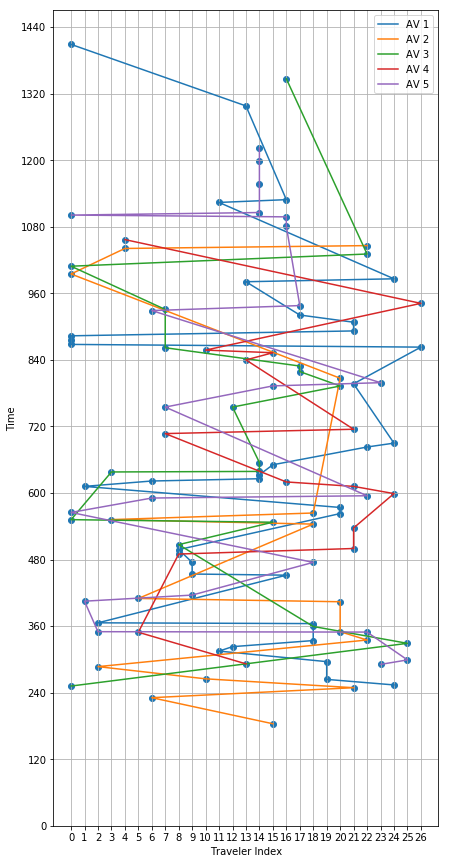

In [492]:
pod.plot_route_info_schedule(community_solution_allcar15['route_info'],community_trips,5)